## Análisis de Componentes Principales

Cuando tenemos muchas columnas de una matriz de datos, el entrenamiento puede tornarse infructuoso dado que se hacen muchos cálculos, más gasto de tiempo y más demora para llegar a una convergencia.

Supongamos que tenemos una matriz de datos de dimensión $(m,n)$, donde $m$ es la cantidad de filas o ejemplos para entrenar los datos y $n$ es la cantidad de columnas ó características que tiene la matriz. Cuando $n$ es tan grande que aumenta el procesamiento y no da para lograr entrenar rápido y efectivamente a un modelo, el PCA o análisis de componentes principales puede ser útil.

PCA consiste en:
1. Previamente estandarizar los datos:
  \begin{equation}X_{escalado} = X - \bar{X}
  \end{equation}
2. Crear la matriz de covarianza entre los datos. Es lógico que la matriz de covarianza será de dimensión $n,n$. Recordemos que la covarianza mide la correlación que hay entre entre una variable y otra. La máxima correlación botará el valor de 1.
  
  \begin{equation}
  \sigma^{2}_{xy} = \frac{\sigma_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n-1}
  \end{equation}
3. Buscar los autovalores y autovectores que satisfagan a la matriz de covarianza:
  \begin{equation}
  Cov*\vec{V} = \lambda * \vec{V}
  \end{equation}
$
  \begin{equation}
\begin{bmatrix}
C_{11} & C_{12} & . & . & . & C_{1n}\\
C_{21} & C_{22} & . & . & . & C_{1n}\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
C_{m1} & C_{m2} & . & . & . & C_{mn}\\
\end{bmatrix} * 
\begin{bmatrix}
v_{1}\\
v_{2}\\
.\\
.\\
.\\
v_{n}
\end{bmatrix} = 
\lambda * 
\begin{bmatrix}
v_{1}\\
v_{2}\\
.\\
.\\
.\\
v_{n}
\end{bmatrix}
\end{equation}$
4. Organizar los autovalores de mayor a menor, de manera que obtengamos los vectores propios que otorgan la mayor varianza. A mayor valor del autovalor, significa que su autovector respectivo nos dará mayor varianza de los datos.
5. Dada esa selección previa de la cantidad de componentes que queremos obtener, se construye la matriz de proyección, esto se hará con la cantidad de componentes que querramos escoger.
6. Luego de ya obtenida la matriz de autovectores, se hace la transformación del conjunto de datos, esto se hace por un producto de matrices de la matriz de datos de dimensión $(m,n)$ ya estandarizada, por la matriz de autovectores de dimensión $(n,z)$, donde $z < n$, lógicamente la matriz resultante es de dimensión $(m,z)$ y tendrá por significado la matriz de datos en modo PCA.

\begin{equation}
X_{transformado}^{(m,z)} = X^{(m,n)}_{centrado} * M_{autovectores}^{(n,z)}
\end{equation}

Se puede saber que los autovalores y autovectores son los correctos si cumplen esta propiedad: $\begin{equation}
C = \begin{bmatrix}
V_{11} & V_{12} & ... & V_{1z}\\
V_{21} & V_{22} & ... & V_{2z}\\
. & . & ... & .\\
. & . & ... & .\\
. & . & ... & .\\
V_{m1} & V_{m2} & ... & V_{mz}\\
\end{bmatrix} * \begin{bmatrix}
\lambda_{1} & 0 & 0 & 0 & ...\\
0 & \lambda_{2} & 0 & 0 & ...\\
0 & 0 & \lambda_{3} & 0 & ...\\
0 & 0 & 0 & ... & ...\\
0 & 0 & 0 & 0 &\lambda{n} \\
\end{bmatrix} * 
\begin{bmatrix}
C_{11} & C_{12} & . & . & . & C_{1n}\\
C_{21} & C_{22} & . & . & . & C_{2n}\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
C_{m1} & C_{m2} & . & . & . & C_{mn}\\
\end{bmatrix}^{-1} = 
\begin{bmatrix}
C_{11} & C_{12} & . & . & . & C_{1n}\\
C_{21} & C_{22} & . & . & . & C_{1n}\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
C_{m1} & C_{m2} & . & . & . & C_{mn}\\
\end{bmatrix}
\end{equation}$

Pongamos un ejemplo sencillo para que sea de sencilla comprensión.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig, det, norm, inv

Creemos una matriz 2x2 que sean nuestros datos

In [3]:
np.random.seed(42)
x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200,1)
y = y.reshape(200,1)

In [4]:
xy = np.hstack([x, y])

$xy$ es muy grande, de dimensión (200,2). Miremos cómo luce en gráfica

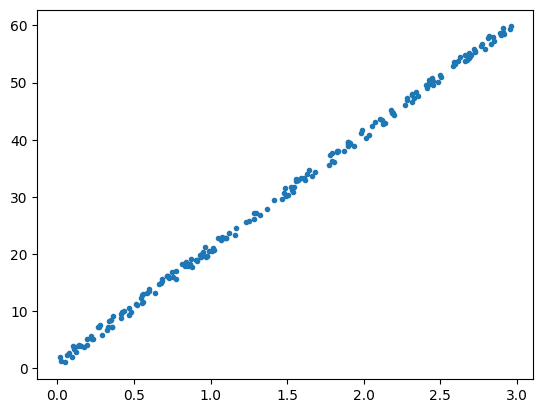

In [6]:
plt.plot(xy[:, 0], xy[:, 1], '.')
plt.show()

Centremos los datos y grafiquemos para saber qué cambió

In [7]:
xy_centrado = xy - np.mean(xy, axis=0)

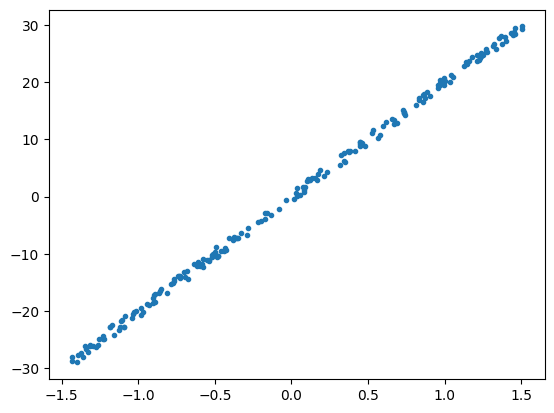

In [8]:
plt.plot(xy_centrado[:, 0], xy_centrado[:, 1], '.')
plt.show()

Vemos claramente que quedaron centrados en el 0. Ahora busquemos los autovalores y autovectores.

In [10]:
avals, avecs = eig(xy_centrado.T.dot(xy_centrado))
avecs

array([[-0.99875285, -0.04992746],
       [ 0.04992746, -0.99875285]])

Ahora lo que necesitamos reflejar es este par de autovectores en la gráfica de los puntos. Creemos las funciones que necesitaremos:

In [11]:
def graficarVectores(vecs, cols, alpha = 1):
    plt.axvline(x = 0, color="grey", zorder = 0)
    plt.axhline(y = 0, color="grey", zorder = 0)
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles = 'xy', scale_units = 'xy',
                   scale = 1, alpha = alpha,
                   color = cols[i]
                  )

In [12]:
def graficarMatriz(matriz, vectorCol=['red', 'blue']):
    #círculo unitario
    x = np.linspace(-1,1, 100000)
    y = np.sqrt(1-(x**2))
    
    #círculo unitario transformado
    x1 = matriz[0,0]*x + matriz[0,1]*y
    y1 = matriz[1,0]*x + matriz[1,1]*y
    x1_neg = matriz[0,0]*x - matriz[0,1]*y
    y1_neg = matriz[1,0]*x - matriz[1,1]*y
    
    #vectores
    u1 = [matriz[0,0], matriz[1,0]]
    v1 = [matriz[1,0], matriz[1,1]]
    
    graficarVectores([u1, v1], cols=[vectorCol[0], vectorCol[1]])
    plt.plot(x1, y1, 'green', alpha = 0.7)
    plt.plot(x1_neg, y1_neg, 'green', alpha = 0.7)

Ahora sí, graficamos los autovectores:

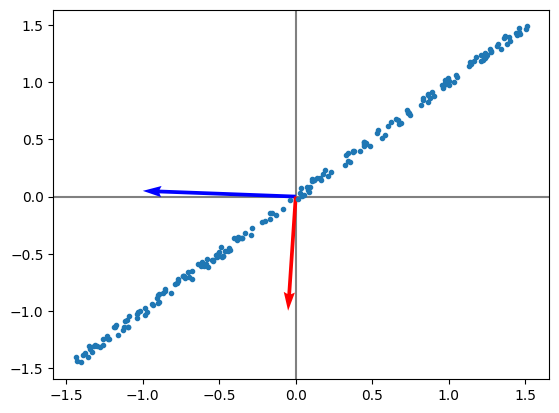

In [13]:
graficarVectores(avecs.T, ['blue', 'red'])
plt.plot(xy_centrado[:,0], xy_centrado[:,1]/20, '.')
plt.show()

Chequeemos los autovalores

In [14]:
avals

array([1.70408413e-01, 6.24117888e+04])

El autovector rojo representa mayor varianza de los datos que el azul. Nos quedaremos con los 2 componentes.

Ordenemos:

In [38]:
componentes_ordenados = np.argsort(avals)[::-1]
matriz_proyeccion = avecs[componentes_ordenados]

Ahora hagamos la transformación:

In [41]:
xy_nuevo = xy_centrado.dot(matriz_proyeccion.T)

In [42]:
xy_nuevo.shape

(200, 2)

Probemos PCA con la librería Scikit-learn.

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)
pca.fit(xy_centrado)
x_pca = pca.transform(xy_centrado)
print(xy_centrado.shape)
print(x_pca.shape)

(200, 2)
(200, 2)


Ya comprendido, hagamos esto con un dataset más amplio, además de real. Tomemos el dataset de NIR de plásticos: